In [2]:
from neuron import h, gui
from neuron.units import ms, mV
h.load_file('SK2017_mosinit.hoc')
#import hpca_session
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import style, rc
import numpy as np
import pickle
style.use("seaborn")
%matplotlib notebook

In [4]:
h.DCa_hpca

0.22

In [5]:
syn_ = h.AlphaSynapse(h.dend11[58](0.3125))
syn_.gmax = 0.1 # us
syn_.onset = 500
syn_.tau = 100
print([item for item in dir(syn_) if not item.startswith('__')])

['alpha', 'baseattr', 'e', 'get_loc', 'get_segment', 'gmax', 'has_loc', 'hname', 'hocobjptr', 'i', 'loc', 'onset', 'same', 'tau']


In [6]:
soma_v = h.Vector().record(h.soma(0.5)._ref_v)
t = h.Vector().record(h._ref_t)
syn_i = h.Vector().record(syn_._ref_i)
syn_v = h.Vector().record(h.dend11[58](0.3125)._ref_v)

In [56]:
?h.Vector

In [17]:
for i in range(10, 21):
    sec = h.dend11[i]
    sec.uninsert("hpca")
    sec.insert("Ca_HVA")
    sec.uninsert("cal")
    sec.insert("cad")
    print('%s: %s' % (sec, ', '.join(sec.psection()['density_mechs'].keys())))

dend11[10]: pas, cad, it2, kca, km, na, Ca_HVA
dend11[11]: pas, cad, it2, kca, km, na, Ca_HVA
dend11[12]: pas, cad, it2, kca, km, na, Ca_HVA
dend11[13]: pas, cad, it2, kca, km, na, Ca_HVA
dend11[14]: pas, cad, it2, kca, km, na, Ca_HVA
dend11[15]: pas, cad, it2, kca, km, na, Ca_HVA
dend11[16]: pas, cad, it2, kca, km, na, Ca_HVA
dend11[17]: pas, cad, it2, kca, km, na, Ca_HVA
dend11[18]: pas, cad, it2, kca, km, na, Ca_HVA
dend11[19]: pas, cad, it2, kca, km, na, Ca_HVA
dend11[20]: pas, cad, it2, kca, km, na, Ca_HVA


In [7]:
h.dend11[10].insert('hpca')
h.dend11[10].uninsert('cad')
h.dend11[10].uninsert('Ca_HVA')
h.dend11[10].insert('cal')

NEURON: cai is being written at the same location by hpca and cad
 in icafit.ses near line 0
 {maction(-1)}
              ^


dend11[10]

<IPython.core.display.Javascript object>


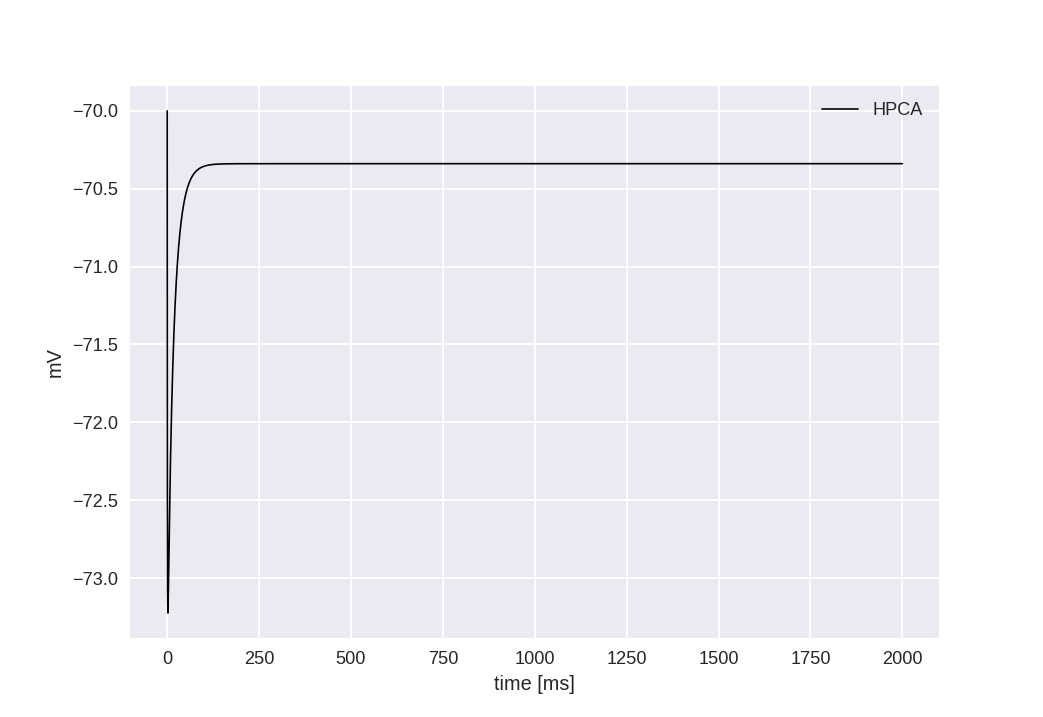

80001
80001


In [10]:
del syn_
h.celsius = 36
h.TotalHPCA_hpca = 0.03821
plt.figure()
h.k8HPCA_hpca = 0.002
h.finitialize(-70 * mV)
h.continuerun(2000 * ms) 

plt.plot(t, soma_v, color='black', label='HPCA', lw=0.9)


plt.xlabel('time [ms]')
plt.ylabel('mV')
plt.legend()
plt.show()

print(len(syn_i))
print(len(syn_v))

In [9]:
syn_g = syn_i.abs() / (syn_v - syn_.e).abs()
print(len(syn_g))

20001


<IPython.core.display.Javascript object>


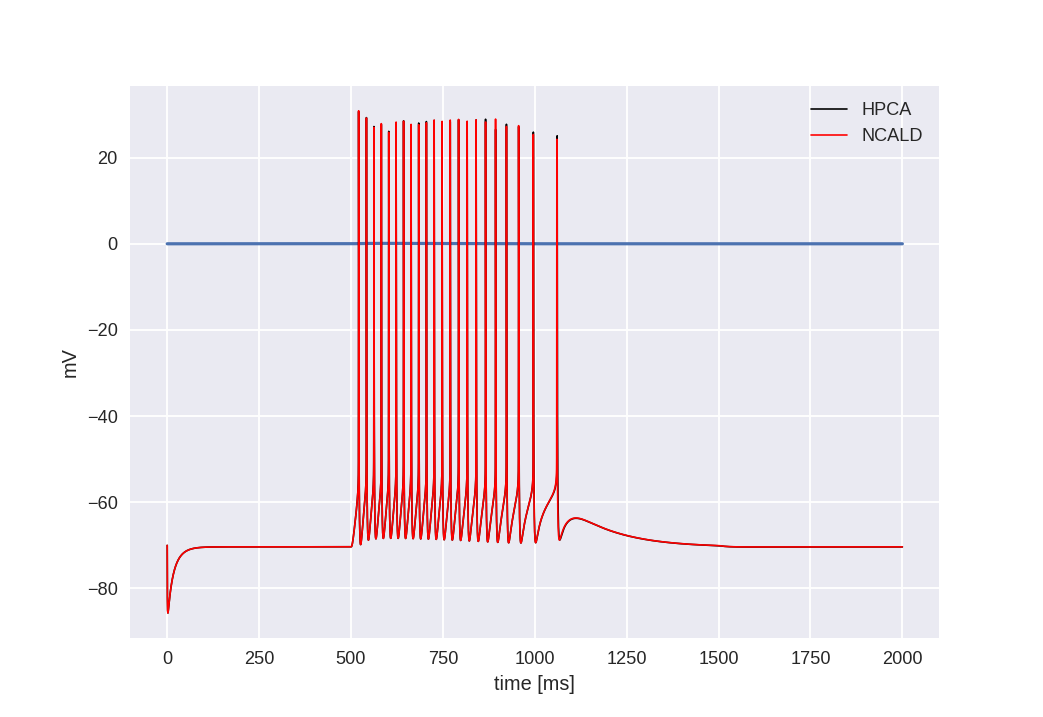

In [12]:

plt.plot(t, syn_g)
plt.show()